In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.data import page
from skimage.filters import threshold_sauvola
from sklearn.preprocessing import normalize

import io
from IPython.display import clear_output, Image, display
import PIL.Image
from keras.models import load_model
import math
import tensorflow as tf
from skimage.color import rgb2gray

Using TensorFlow backend.


In [3]:
from util.WordSegmentation import wordSegmentation, prepareImg
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto(
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.8)
    # device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
set_session(session)

In [4]:
class_names = [
    "Alef",
    "Ayin",
    "Bet",
    "Dalet",
    "Gimel",
    "He",
    "Het",
    "Kaf",
    "Kaf-final",
    "Lamed",
    "Mem",
    "Mem-medial",
    "Nun-final",
    "Nun-medial",
    "Pe",
    "Pe-final",
    "Qof",
    "Resh",
    "Samekh",
    "Shin",
    "Taw",
    "Tet",
    "Tsadi-final",
    "Tsadi-medial",
    "Waw",
    "Yod",
    "Zayin"
]

In [5]:
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

In [6]:
model = load_model('temporary.best.hdf5')
# new_model = tf.keras.experimental.load_from_saved_model(saved_model_path)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 30, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 19712)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2523264   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [7]:
import_images = []
import_images.append(prepareImg(cv2.imread('input_files_word_old/slice4.png'), 50))

In [8]:
res = []
words = []
for i, img in enumerate(import_images):
    res = wordSegmentation(img, kernelSize=5, sigma=5, theta=7, minArea=30) # fix parameters

In [9]:
for (j, w) in enumerate(res):
    (wordBox, wordImg) = w
    (x, y, w, h) = wordBox
    if (w > 20):
        words.append(wordImg)

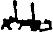

In [10]:
for word in words:
    showarray(word)

In [14]:
word = words[2]
h, w = word.shape
num = 4
chars = []
for i in range(num):
    part = math.floor(w / num)
    char = word[:,part * i:(part * i) + part]
    shape = cv2.resize(char,(32,48))
    ret,thresh1 = cv2.threshold(shape,127,255,cv2.THRESH_BINARY)
    chars.append(thresh1)

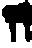

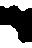

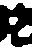

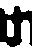

In [15]:
for char in chars:
    showarray(char)

In [109]:
fonts = []
for item in class_names:
    fonts.append(cv2.imread('habbakuk/' + item + '/standard.png'))

(48, 32)
Predicted:  [6.7035506e-07 3.7434093e-05 8.2992196e-01 2.4722362e-06 3.7271735e-12
 2.4352733e-02 2.1290813e-05 7.0359939e-01 1.8574927e-12 1.4832595e-09
 1.3328763e+00 3.4706034e-05 5.2947755e-12 2.0543346e-06 5.7090167e-04
 5.0595930e-11 1.1065767e+00 1.4203623e-07 8.9207108e+01 3.3028971e-02
 5.3151703e-06 6.7618713e+00 1.6215855e-10 8.8498815e-08 1.2447937e-06
 4.2667529e-11 1.6573350e-18]
Index of class with highest probability:  18
Value of highest probability:  0.89207107
Name of predicted class:  Samekh
habbabuk/Samekh/standard.png


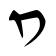

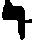

(48, 32)
Predicted:  [1.94959604e-04 8.83834073e-05 2.59066162e+01 1.16467499e-03
 4.08499083e-08 1.86264515e-01 4.56028065e-04 2.81528115e+00
 9.44021572e-09 9.65101549e-07 6.65542936e+00 7.66199722e-04
 1.58541980e-08 2.39675908e-04 1.57521255e-02 1.15288245e-07
 3.47197175e+00 2.29126294e-04 4.70431137e+01 8.81421715e-02
 1.06965257e-02 1.37997513e+01 4.39362857e-08 3.56278069e-05
 3.82107752e-03 7.59472869e-07 7.73169777e-14]
Index of class with highest probability:  18
Value of highest probability:  0.47043112
Name of predicted class:  Samekh
habbabuk/Samekh/standard.png


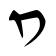

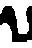

(48, 32)
Predicted:  [1.5626008e-05 3.8343569e-06 9.1494637e+01 4.6577578e-04 9.4739967e-09
 2.0193807e-03 2.8488600e-06 4.4246044e+00 3.7512695e-09 3.8842180e-07
 5.4627454e-01 7.7557412e-04 2.4404311e-08 9.3241018e-05 4.4594813e-02
 4.2631925e-09 3.1589333e-02 7.2478288e-05 1.2610711e+00 3.8923926e-04
 9.6453167e-03 2.1828349e+00 1.2754389e-09 2.1567766e-04 6.8322418e-04
 9.5229716e-08 2.9309444e-14]
Index of class with highest probability:  2
Value of highest probability:  0.9149464
Name of predicted class:  Bet
habbabuk/Bet/standard.png


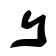

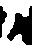

(48, 32)
Predicted:  [2.09305767e-06 2.20427264e-05 8.18937683e+01 1.44123173e-04
 6.00323624e-10 1.81334966e-03 1.35450205e-06 1.00527115e+01
 7.65683073e-10 2.57511260e-07 6.35453641e-01 5.77906845e-04
 3.63625596e-09 7.92105857e-05 6.60410672e-02 2.86884821e-10
 1.74894974e-01 1.21737303e-05 5.02662086e+00 1.75006484e-04
 1.07430865e-03 2.14650154e+00 1.64079361e-09 3.71709502e-05
 7.88983089e-05 3.95385458e-09 2.06929471e-15]
Index of class with highest probability:  2
Value of highest probability:  0.81893766
Name of predicted class:  Bet
habbabuk/Bet/standard.png


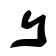

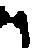

In [114]:
for char in chars:
#     char_pred = cv2.cvtColor(char, cv2.COLOR_BGR2GRAY)
    char_pred = np.asarray(char[:], dtype='float32')
    print(char_pred.shape)
    char_pred = normalize(char_pred)
    char_pred = char_pred.reshape(-1, 48, 32,1)

    prediction = model.predict([char_pred])
    for i in range(len(prediction)):
        print('Predicted: ', prediction[i] * 100)
    highest_index = np.argmax(prediction)
    print('Index of class with highest probability: ',highest_index)
    print('Value of highest probability: ', prediction[0][highest_index])
    print('Name of predicted class: ', class_names[highest_index])
    print('habbabuk/' + class_names[highest_index] + '/standard.png')
    character_example = cv2.imread('habbakuk/' + str(class_names[highest_index]) + '/standard.png')
    showarray(character_example)
    showarray(char)

In [95]:
# for box in bounding_boxes:
#     xStart = box[2]
#     xEnd = box[0]
#     y = box[1]
#     winH = box[3] - y
#     winWidth = 5
#     while(xStart-winWidth >= xEnd) :
#         hit = False
#         winW = winWidth
#         a = 0
#         # While the image is not classified and the box has not reached the edge,
#         # increase window size
#         while(not hit and xStart-winW >= xEnd) :
#             newX = xStart - winW
#             # Draw the window
#             clone = img.copy()
#             cv2.rectangle(clone, (xStart, y), (newX, y + winH), (255, 0, 0), 2)
#             cv2.rectangle(clone, (xStart,y),(xEnd,y + winH), (0,255,0), 2)
#             cv2.imshow("Window", clone)
#             cv2.waitKey(0)
#             # Check if the CNN returns a high probability for a letter
#             # for prob in probabilities :
#             #     if prob >= 0.75 :
#             #         hit = True
#             #         xStart = newX
#             # # Increase size of window if nothing has been found
#             winW += 5
#             # this is done to ensure that the loop ends for now, because not
#             # connected to cnn yet.
#             hit = True
#             xStart = newX

In [49]:
# def get_resized_img(img, video_size):
#     width, height = video_size  # these are the MAX dimensions
#     video_ratio = width / height
#     img_ratio = img.size[0] / img.size[1]
#     if video_ratio >= 1:  # the video is wide
#         if img_ratio <= video_ratio:  # image is not wide enough
#             width_new = int(height * img_ratio)
#             size_new = width_new, height
#         else:  # image is wider than video
#             height_new = int(width / img_ratio)
#             size_new = width, height_new
#     else:  # the video is tall
#         if img_ratio >= video_ratio:  # image is not tall enough
#             height_new = int(width / img_ratio)
#             size_new = width, height_new
#         else:  # image is taller than video
#             width_new = int(height * img_ratio)
#             size_new = width_new, height
#     return np.asarray(img.resize(size_new, resample=Image.LANCZOS))

In [ ]:
# char = cv2.cvtColor(char, char, cv2.COLOR_BGR2GRAY)